In [4]:
import os
import numpy as np
import pandas as pd
from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture

from model_training.measures import summary, get_true_and_predicted_labels

In [5]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
CLASS_LABELS = os.listdir('../data/tsrc_spectrograms_cleaned/train')

## Spectrograms

In [4]:
DATASET_NAME = "tsrc_spectrograms"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [7]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 17%|█▋        | 1/6 [08:16<41:20, 496.04s/it]

Epoch 0 Done after 496.04262137413025 seconds


 33%|███▎      | 2/6 [11:56<22:14, 333.65s/it]

Epoch 1 Done after 219.9745647907257 seconds


 50%|█████     | 3/6 [15:42<14:13, 284.58s/it]

Epoch 2 Done after 226.18097138404846 seconds


 67%|██████▋   | 4/6 [19:19<08:35, 257.86s/it]

Epoch 3 Done after 216.89808058738708 seconds


 83%|████████▎ | 5/6 [22:55<04:02, 242.76s/it]

Epoch 4 Done after 215.98476910591125 seconds


100%|██████████| 6/6 [26:32<00:00, 265.34s/it]

Epoch 5 Done after 216.95074915885925 seconds
Finished Training


In [8]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [9]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8036801231372
Micro F1 Score: 0.8036801231372
Macro F1 Score: 0.8082528973293771
Weighted F1 Score: 0.8053908533840255


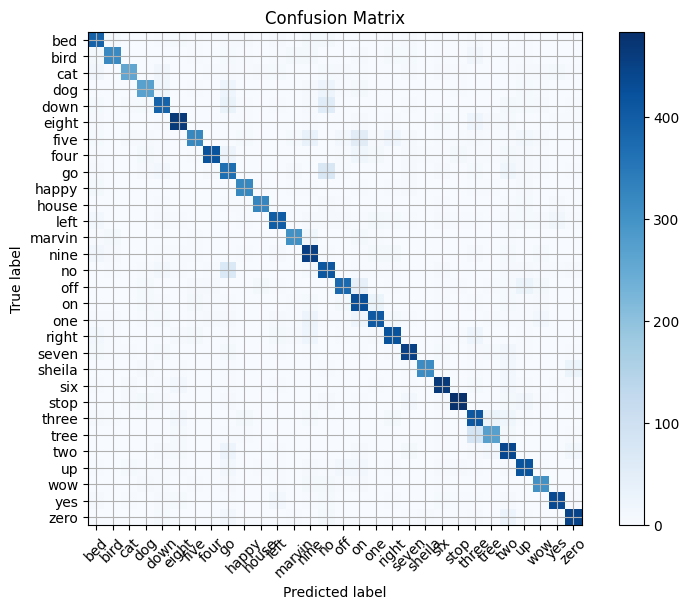

In [10]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)

## Audio-cleaned spectrograms

In [3]:
DATASET_NAME = "tsrc_spectrograms_cleaned"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [ ]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 17%|█▋        | 1/6 [03:46<18:50, 226.02s/it]

Epoch 0 Done after 226.02195763587952 seconds


 33%|███▎      | 2/6 [07:43<15:29, 232.47s/it]

Epoch 1 Done after 236.97732377052307 seconds


 50%|█████     | 3/6 [11:35<11:37, 232.64s/it]

Epoch 2 Done after 232.84228348731995 seconds


 67%|██████▋   | 4/6 [15:33<07:49, 234.69s/it]

Epoch 3 Done after 237.8229467868805 seconds


 83%|████████▎ | 5/6 [19:37<03:57, 237.99s/it]

Epoch 4 Done after 243.83329319953918 seconds


100%|██████████| 6/6 [23:50<00:00, 238.45s/it]

Epoch 5 Done after 253.14769339561462 seconds
Finished Training


In [ ]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [6]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8235339446713416
Micro F1 Score: 0.8235339446713416
Macro F1 Score: 0.8251018000470574
Weighted F1 Score: 0.8238400788702939


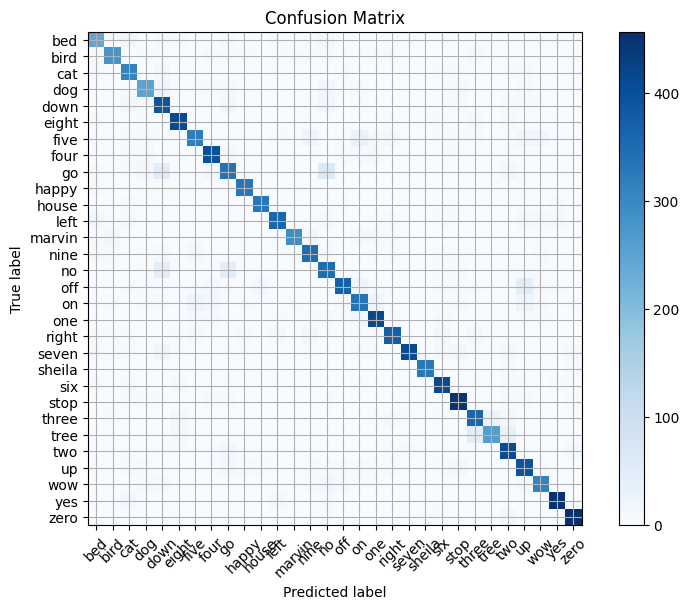

In [4]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)

## Audio-cleaned sharpened spectrograms

In [11]:
DATASET_NAME = "tsrc_spectrograms_cleaned_sharpened"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [12]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 17%|█▋        | 1/6 [08:16<41:23, 496.60s/it]

Epoch 0 Done after 496.6031503677368 seconds


 33%|███▎      | 2/6 [13:50<26:44, 401.13s/it]

Epoch 1 Done after 334.29458022117615 seconds


 50%|█████     | 3/6 [17:39<16:06, 322.16s/it]

Epoch 2 Done after 228.19038271903992 seconds


 67%|██████▋   | 4/6 [21:27<09:30, 285.02s/it]

Epoch 3 Done after 228.07340216636658 seconds


 83%|████████▎ | 5/6 [25:14<04:24, 264.33s/it]

Epoch 4 Done after 227.64499282836914 seconds


100%|██████████| 6/6 [29:02<00:00, 290.38s/it]

Epoch 5 Done after 227.48763132095337 seconds
Finished Training


In [13]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [16]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.824599454278318
Micro F1 Score: 0.8245994542783179
Macro F1 Score: 0.8269956027831707
Weighted F1 Score: 0.8250912806309787


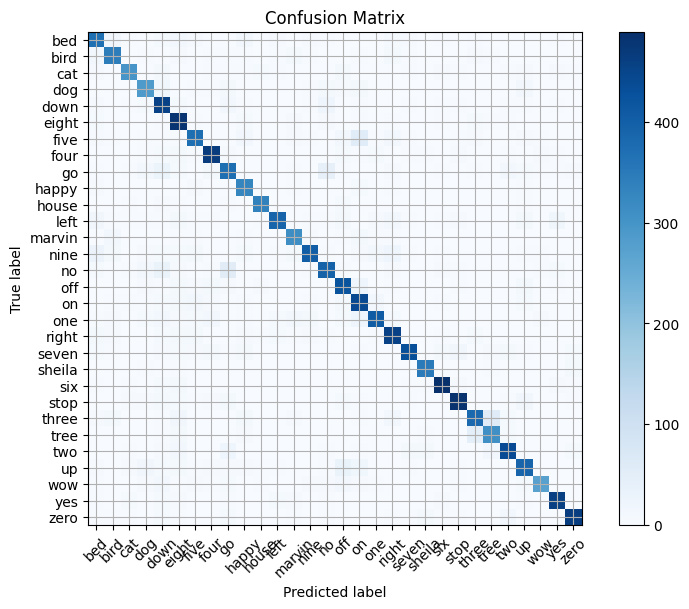

In [19]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary(y_true, y_pred, CLASS_LABELS)

## Audio-cleaned augmented sharpened sprectrograms 

In [6]:
DATASET_NAME = "tsrc_spectrograms_cleaned_augmented_sharpened"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [4]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


Validation: 100%|██████████| 1001/1001 [02:04<00:00,  8.04it/s]


Epoch 0 Done after 676.5430860519409 seconds


Validation: 100%|██████████| 1001/1001 [00:46<00:00, 21.48it/s]


Epoch 1 Done after 263.93427062034607 seconds


Validation: 100%|██████████| 1001/1001 [00:44<00:00, 22.55it/s]


Epoch 2 Done after 254.96184659004211 seconds


Validation: 100%|██████████| 1001/1001 [00:44<00:00, 22.63it/s]


Epoch 3 Done after 244.66389155387878 seconds


Validation: 100%|██████████| 1001/1001 [00:44<00:00, 22.42it/s]


Epoch 4 Done after 247.0729944705963 seconds


Validation: 100%|██████████| 1001/1001 [00:45<00:00, 21.96it/s]


Epoch 5 Done after 254.71482944488525 seconds
Finished Training


0.8707156262699988

In [20]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [21]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8441894633736794
Micro F1 Score: 0.8441894633736794
Macro F1 Score: 0.8469094276681396
Weighted F1 Score: 0.8445212173548412


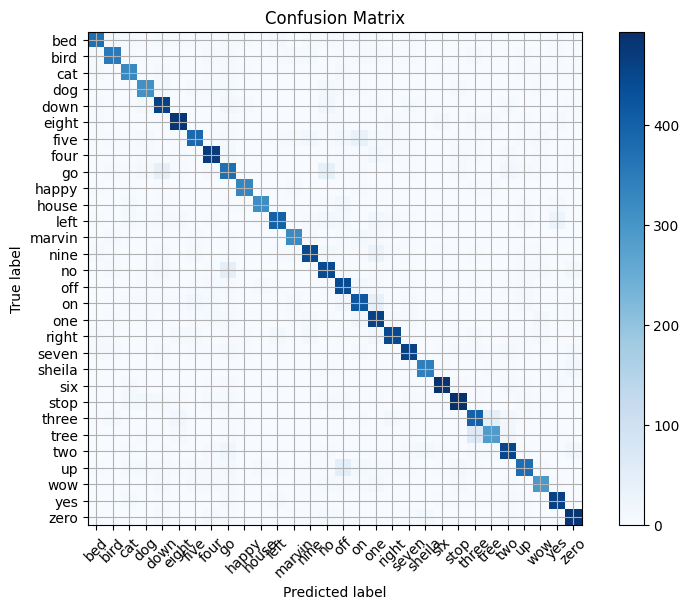

In [22]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary(y_true, y_pred, CLASS_LABELS)

### Audio-cleaned augmented sharpened sprectrograms with aggregation

In [7]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test", '../data/tsrc_cleaned_augmented/test')

  3%|▎         | 498/14293 [00:51<26:18,  8.74it/s]p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1867
  warnings.warn(
  6%|▋         | 906/14293 [01:35<26:22,  8.46it/s]p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1560
  warnings.warn(
 17%|█▋        | 2384/14293 [04:18<21:29,  9.24it/s]  p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2032
  warnings.warn(
 19%|█▉        | 2711/14293 [04:55<22:12,  8.69it/s]  p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1939
  warnings.warn(
 19%|█▉        | 2774/14293 [05:02<22:30,  8.53it/s]p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\librosa\core\spectrum.py:266:

In [8]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.8521653956482194
Micro F1 Score: 0.8521653956482194
Macro F1 Score: 0.853886283097096
Weighted F1 Score: 0.8522792772928726


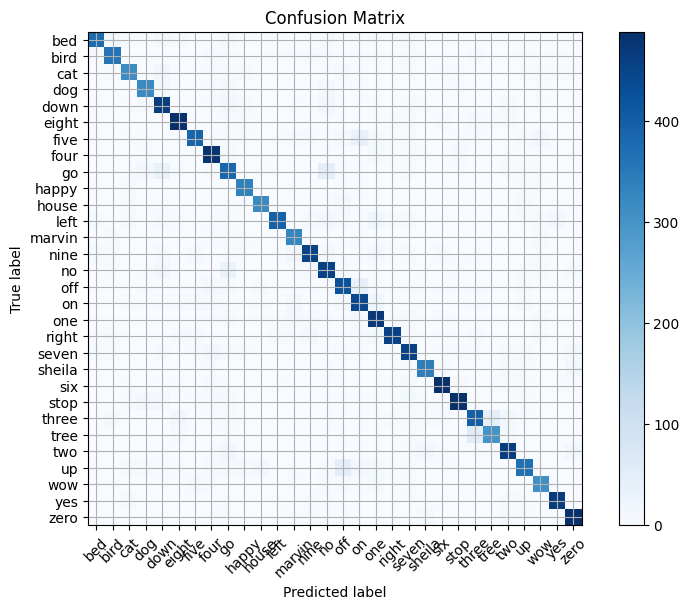

In [9]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary(y_true, y_pred, CLASS_LABELS)

## Spectrograms and removed red channel

In [3]:
ARCHITRECTURE = SimpleConvolutionArchitecture(rgba_channels=[1, 2]) # 1 - Blue, 2 - Green

In [4]:
DATASET_NAME = "tsrc_spectrograms"
DATASET_PATH = f"../data/{DATASET_NAME}"
FOLDER_PATH = f"../models/simple_cnn_wo_red_channel_{DATASET_NAME}"
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)

In [5]:
model.fit(
    f"{DATASET_PATH}/train", 
    f"{DATASET_PATH}/validation",
    batch_size=32,
    n_epochs=6,
)

p:\MINI8\I2ML\intro-to-ml\venv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Running training on GPU...


 17%|█▋        | 1/6 [03:45<18:46, 225.24s/it]

Epoch 0 Done after 225.23633813858032 seconds


 33%|███▎      | 2/6 [07:23<14:44, 221.13s/it]

Epoch 1 Done after 218.24670362472534 seconds


 50%|█████     | 3/6 [11:05<11:05, 221.67s/it]

Epoch 2 Done after 222.30684995651245 seconds


 67%|██████▋   | 4/6 [14:43<07:20, 220.16s/it]

Epoch 3 Done after 217.82807540893555 seconds


 83%|████████▎ | 5/6 [18:18<03:38, 218.07s/it]

Epoch 4 Done after 214.36224222183228 seconds


100%|██████████| 6/6 [21:56<00:00, 219.41s/it]

Epoch 5 Done after 218.44769597053528 seconds
Finished Training


In [6]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET_PATH}/test")

In [7]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.784020149723641
Micro F1 Score: 0.784020149723641
Macro F1 Score: 0.786697171242573
Weighted F1 Score: 0.7836383039137939


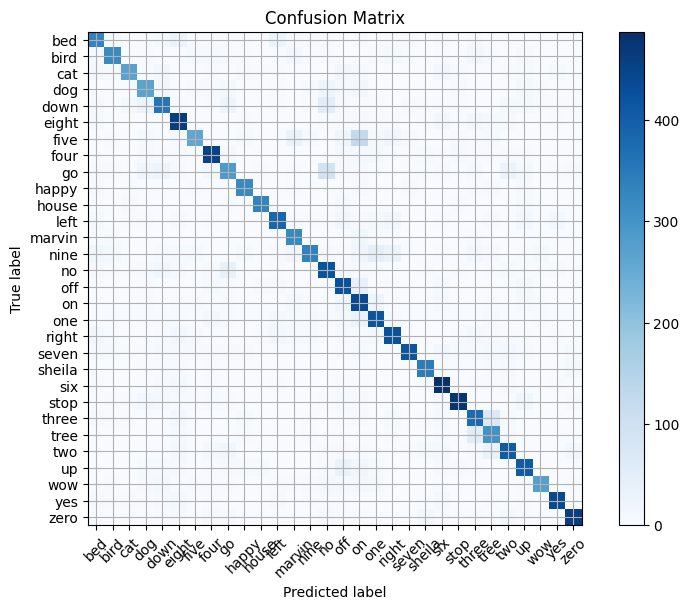

In [8]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary(y_true, y_pred, CLASS_LABELS)